# Vihang lawand project

In [6]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
# reading the data
df = pd.read_csv('Mall_Customers.csv')
df.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [8]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# Calculate gender split
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print("Gender Split (%):\n")
print(gender_counts)

Gender Split (%):

Female    56.0
Male      44.0
Name: Gender, dtype: float64


In [1]:
# Create Histograms
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, bins=15, kde=True, color='skyblue')
    plt.xlabel(col)

plt.suptitle('Distribution of Age, Annual Income & Spending Score', fontsize=17, fontweight = 'bold', ha='center')
plt.subplots_adjust(wspace=0.2)

NameError: name 'plt' is not defined

<Figure size 1080x432 with 0 Axes>

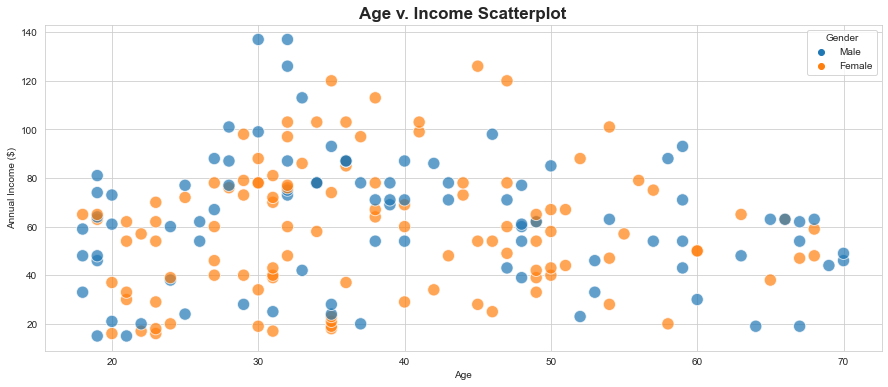

In [18]:

# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Create Scatterplot
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', s=150, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.title('Age v. Income Scatterplot', fontsize=17, fontweight = 'bold')

# Display
plt.show()

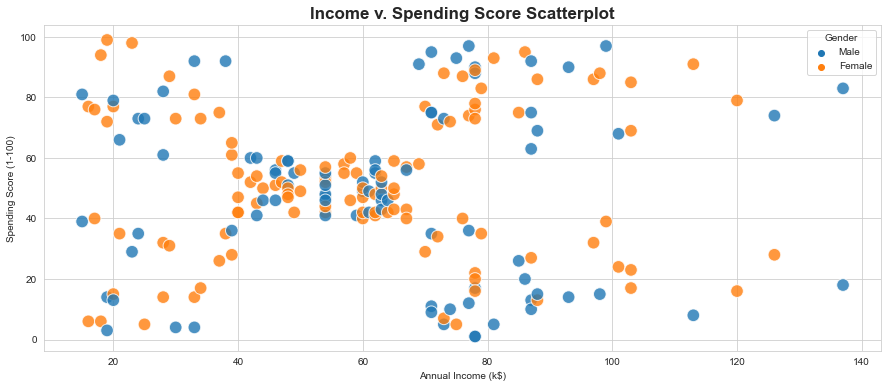

In [19]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Create scatter plot of Annual Income and Age, colored by Gender
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender',  s=160, alpha=0.8)

# Add title
plt.title('Income v. Spending Score Scatterplot', fontsize=17, fontweight='bold')

# Display
plt.show()

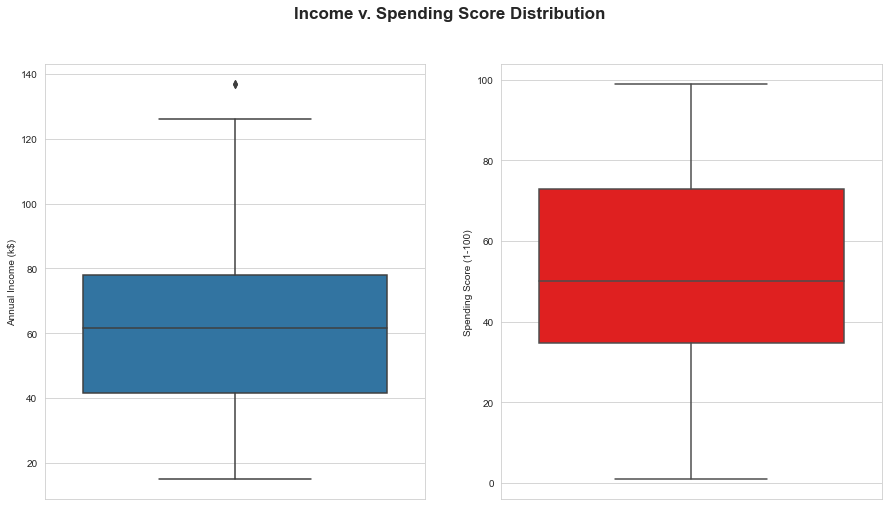

In [20]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))

# Create boxplots
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Annual Income (k$)"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Spending Score (1-100)"], color='red')

# Add title
plt.suptitle('Income v. Spending Score Distribution', fontsize=17, fontweight='bold', x=0.5)

# Display
plt.show()

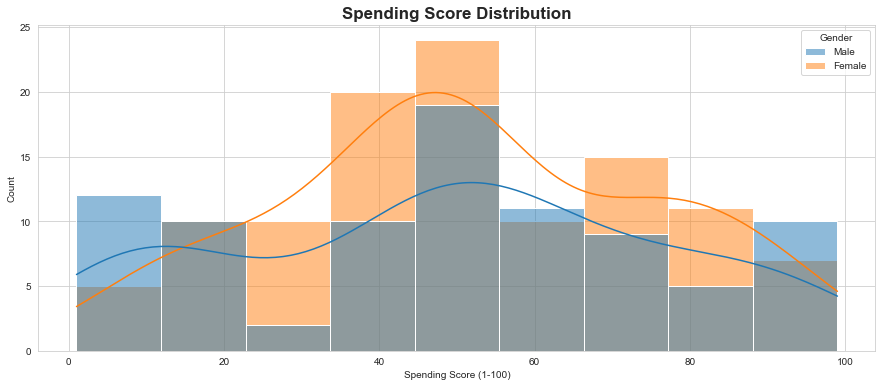

In [21]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Create Histogram
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', kde=True)

# Add title
plt.title('Spending Score Distribution', fontsize=17, fontweight='bold')

# Display
plt.show()

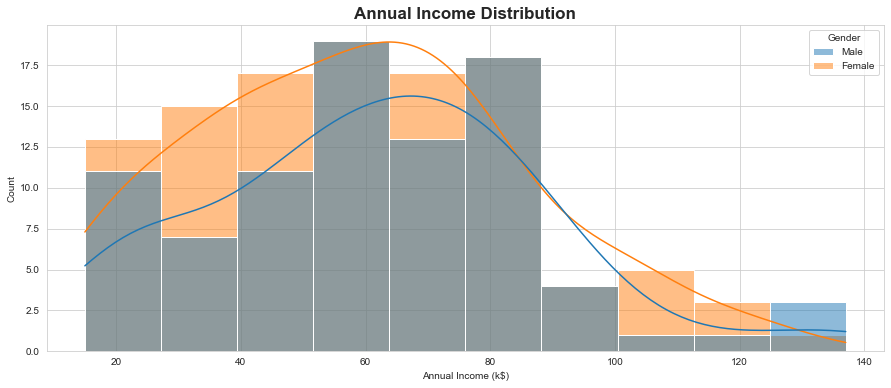

In [22]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Create Histogram
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', kde=True)

# Add title
plt.title('Annual Income Distribution', fontsize=17, fontweight='bold')

# Display
plt.show()

In [23]:
# Normalise data 

# Select numerical columns to normalize
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialise scaler
scaler = MinMaxScaler()

# Normalise 
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020


In [24]:
# Create empty lists for WCSS values & their respective K Values
wcss_values = []
k_values = []

# Fit KMeans 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss_values.append(kmeans.inertia_)
    k_values.append(k)

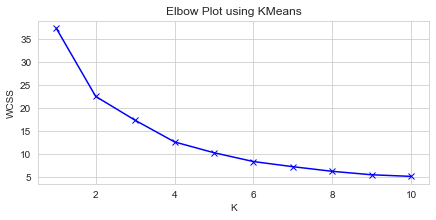

In [28]:
# Plot Elbow plot
plt.figure(figsize=(7, 3))
plt.plot(k_values, wcss_values, 'bx-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Plot using KMeans')
plt.show()

In [29]:
# Also sense-checking using k-means++ 

# Determine optimal number of clusters
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



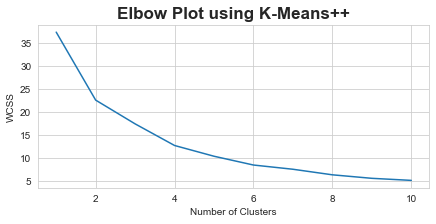

In [30]:
# Plot WCSS values against number of clusters
plt.figure(figsize=(7, 3))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot using K-Means++', fontsize=17, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

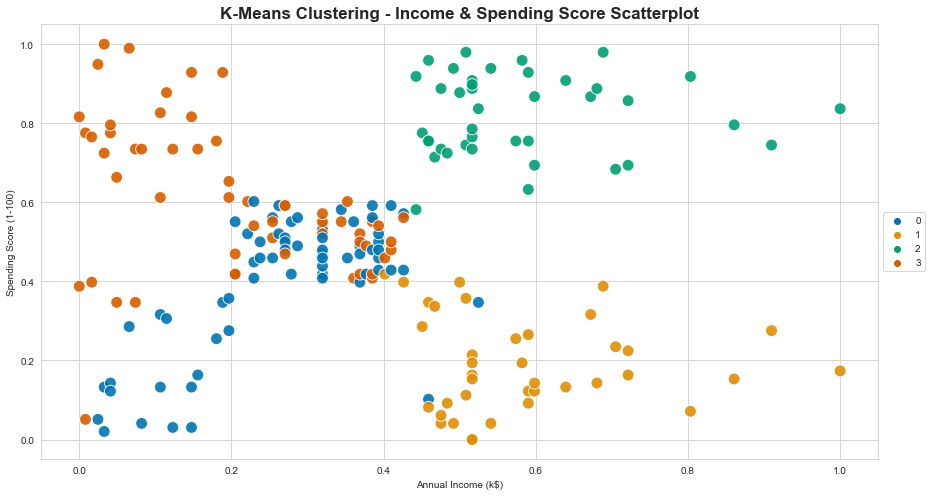

In [32]:
# Create k-means object - 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit k-means object to the data
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Add cluster labels to original df
df['Cluster'] = kmeans.labels_

# Set style & figure size
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))

# Plot clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='colorblind', alpha=0.9, s=140)

# Set title, axis labels & legend 
plt.title('K-Means Clustering - Income & Spending Score Scatterplot', fontsize=17, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display 
plt.show()

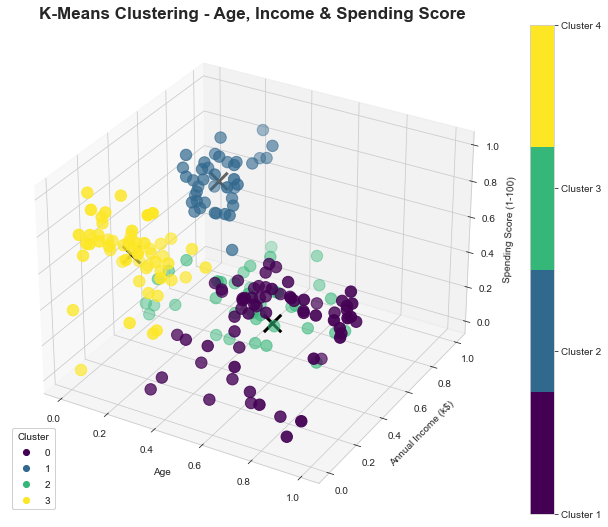

In [33]:
# Create k-means object - 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit k-means object to the data
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Add cluster labels to original df
df['Cluster'] = kmeans.labels_

# Set style 
sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 9))

# Create custom colormap 
my_cmap = plt.cm.get_cmap('viridis', 4)

# Create 3D scatter plot 
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], s=130, cmap=my_cmap)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)

# Set the colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(0, 4))
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering - Age, Income & Spending Score', fontsize=17, fontweight='bold')

# Plot centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=300, linewidths=3, color='black', zorder=10)

# Display
plt.show()


In [34]:
# Centroids (centre points) of each of the 4 clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[0.69201183 0.26809584 0.39764521]
 [0.28605769 0.58278689 0.82168367]
 [0.41093117 0.58606557 0.1895811 ]
 [0.14304993 0.20491803 0.60508414]]


In [35]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.392319202055722


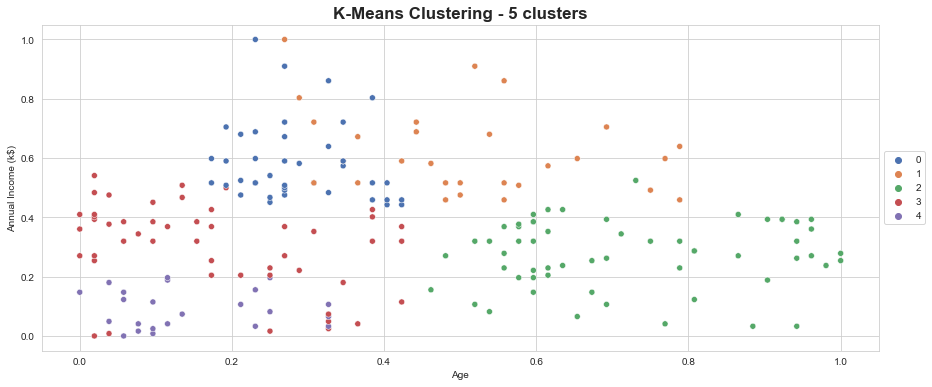

In [36]:
# Select features for clustering, including age
Y = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Define number of clusters
k = 5

# Initialise KMeans model 
kmeans = KMeans(n_clusters=k, init='k-means++')

# Fit data to the KMeans model
kmeans.fit(Y)

# Add the predicted cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Visualise clusters 

# Set style & figure size
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Create Scatterplot
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='deep')
plt.title('K-Means Clustering - 5 clusters', fontsize=17, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display
plt.show()

In [37]:
silhouette_avg = silhouette_score(Y, kmeans.labels_)
print("The average silhouette score for the clustering with", k, "clusters is:", silhouette_avg)

The average silhouette score for the clustering with 5 clusters is: 0.40611743307078185
